# Aviation Safety Risk Analysis  

## Business Understanding

### Stakeholder
The primary stakeholder for this project is the Head of the Aviation Division, who is responsible for making strategic decisions regarding aircraft acquisition and operational planning as the company expands into the aviation industry.

### Business Problem
As the company enters the aviation market, it faces substantial safety, regulatory, and financial risks associated with aircraft operations. Leadership currently lacks data-driven insight into which aircraft manufacturers and models are associated with lower accident frequency and injury severity. Without this information, aircraft purchasing decisions may expose the organization to avoidable operational and reputational risk.

### Project Goal
The goal of this project is to analyze historical aviation accident data to identify aircraft manufacturers and models that are associated with lower operational risk. By evaluating accident severity and injury outcomes, this analysis aims to support informed, data-driven aircraft acquisition decisions.

### Key Business Questions
- Which aircraft manufacturers and models have historically been involved in fewer and less severe accidents?
- How do accident frequency and injury severity vary across aircraft types and manufacturers?
- Are there observable trends in aviation accident severity over time?
- Which aircraft characteristics are most strongly associated with lower overall risk?

### Success Criteria
This project will be considered successful if it produces clear, well-supported insights that translate into three actionable business recommendations for selecting lower-risk aircraft. These recommendations should be supported by visual evidence and be understandable to non-technical stakeholders.

---

## Data Understanding & Initial Exploration

### Business Context
To minimize operational risk as the company enters the aviation industry, it is essential to understand historical safety performance across different aircraft. Aviation accident data provides valuable insight into patterns of accident occurrence, injury severity, and potential risk factors associated with aircraft design and usage.

### Objectives of This Step
- Understand the structure, scope, and size of the dataset  
- Identify variables relevant to assessing aircraft safety risk  
- Evaluate data quality, including missing or inconsistent values  
- Confirm the time range covered by the dataset  
- Establish a foundation for responsible data cleaning and analysis  

This initial exploration ensures that subsequent data preparation and analysis steps are grounded in a clear understanding of the dataset and its limitations.



**IMPORT LIBRARIES**

In [69]:
import pandas as pd # for data manipulation
import numpy as np # numerical handling
import matplotlib.pyplot as plt # exploring visuals
import seaborn as sns
import os
os.getcwd()
os.listdir("..")


pd.set_option("display.max_columns", None)

In [70]:
os.listdir("../data")

['AviationData.csv', 'processed']

**LOAD DATA**

In [71]:
data_path = "../data/AviationData.csv"
df = pd.read_csv(data_path, encoding="latin1")

C:\Users\HomePC\AppData\Local\Temp\ipykernel_29956\4176801064.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, encoding="latin1")


In [72]:
df.shape # This shows how many rows and columns we have in our dataset

(88889, 31)

**Preview the Data**

In [73]:
df.head() # shows the first five rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [74]:
df.tail() # shows the last five rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


**Understand Column Structure**

In [104]:
df.info() #Look for:

#Column names

#Data types

#Missing values

#memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

**Summary Statistics**

In [105]:
df.describe(include="all") # This gives statistical summary of the DataFrame.
                        # mean, count, min, std, max, median.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.000000,81793,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,NaN,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,NaN,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,NaN,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,1999-09-17 17:13:39.354475904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1998-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2009-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,NaN


**Check Missing Values (Very Important)**

In [106]:
df.isnull().sum().sort_values(ascending=False).head(15) # found the sum of missing values in every column and arranged it in ascending order. from the largest to smallest

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
dtype: int64

**TIME COVERAGE**

In [ ]:
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")   #This confirms:

Earliest year

Latest year

Whether dates parse correctly

df["Event.Date"].min(), df["Event.Date"].max()

(Timestamp('1948-10-24 00:00:00'), Timestamp('2022-12-29 00:00:00'))

This confirms, earliest year, latest year, whether dates parse correctly.

## Initial Observations

An initial review of the dataset revealed several important characteristics that informed subsequent data preparation and analysis decisions:

- The dataset contains aviation accident and incident records spanning multiple decades, allowing for both cross-sectional and time-based analysis.
- A number of variables contain substantial missing values, particularly in injury counts and aircraft-specific fields, indicating the need for careful data cleaning and filtering.
- Injury-related variables (fatal, serious, and minor injuries) appear well-suited for assessing accident severity and overall operational risk.
- Aircraft-related fields, including manufacturer, model, and aircraft category, are central to understanding differences in safety outcomes.
- Several categorical fields exhibit inconsistent formatting and naming conventions, suggesting that standardization will be necessary to ensure accurate grouping and aggregation.

These observations guided decisions around variable selection, handling of missing data, and the choice of risk metrics used in the analysis.

## Data Preparation

The purpose of the data preparation step is to transform the raw aviation accident dataset into a clean, focused, and analysis-ready format. This process ensures that subsequent analysis and visualizations are based on reliable and relevant information.

By the end of this step, the following objectives should be achieved:

- Identification of columns most relevant to assessing aircraft safety risk, with a focus on injury severity and aircraft characteristics  
- Reduce the dataset to a targeted subset of observations and variables aligned with the business problem  
- Handled missing values intentionally to avoid introducing bias or misleading results  
- Created basic risk-related metrics to support meaningful comparison across aircraft manufacturers and categories  
- Saved a processed dataset for reproducible analysis and use in visualization tools such as Tableau  

These preparation steps establish a consistent and trustworthy foundation for exploratory data analysis and business insight generation.

**Identify Risk-Relevant Columns**

We don’t need all columns. For aviation risk, the most important ones are:

**Aircraft & Event Info**

- Make
- Model

**Aircraft.Category**

- Event.Date
- severity / Risk Indicators
- Injury.Severity
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries

**1. Select Columns**

In [79]:
risk_columns = [
    "Event.Date",
    "Make",
    "Model",
    "Aircraft.Category",
    "Injury.Severity",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries"
]

risk_df = df[risk_columns].copy()

risk_df.head()

,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,NaN,NaN
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,NaN


.copy() prevents accidental modification of the original data.

**2. Check Missing Values**

In [80]:
risk_df.isna().sum()

Event.Date                    0
Make                         63
Model                        92
Aircraft.Category         56602
Injury.Severity            1000
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
dtype: int64

This tells us:

Which columns are problematic

What cleaning strategy we need

**Cleaning Strategy**

- Drop rows missing Make or Model

- Convert injury counts to numeric

- Replace missing injury counts with 0
  Justification: missing often means “no injuries reported”

**3. Drop Rows Without Aircraft Info**

In [81]:
risk_df = risk_df.dropna(subset=["Make", "Model"]) # We cannot assess aircraft risk without knowing the aircraft


**4. Clean Injury Columns**

In [82]:
injury_cols = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries"
]

for col in injury_cols:
    risk_df[col] = pd.to_numeric(risk_df[col], errors="coerce").fillna(0)


**5. Create a Risk Metric**

Add total injuries as a simple risk proxy:

In [83]:
risk_df["Total.Injuries"] = (
    risk_df["Total.Fatal.Injuries"]
    + risk_df["Total.Serious.Injuries"]
    + risk_df["Total.Minor.Injuries"]
)

risk_df.head()


,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,2.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,4.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,0.0,0.0,3.0
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,2.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,0.0,3.0


**6. Save Cleaned Dataset**

In [84]:
import os
os.makedirs("../data/processed", exist_ok=True)

In [85]:
risk_df.to_csv("../data/processed/aviation_cleaned.csv", index=False)


**EXPLORATORY DATA ANALYSIS (EDA) & RISK ANALYSIS**

This step answers:
“Which aircraft appear to be lower risk, based on historical accident data?” This is where your recommendations will come from.

Let's confirm a few things and that we are all set, no accidental overwrites

In [108]:
risk_df.shape # shows how many rows and columns we have now

(88777, 10)

In [87]:
risk_df.head() # show the first five rows


,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,2.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,4.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,0.0,0.0,3.0
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,2.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,0.0,3.0


**Accident Count by Manufacturer**

This tells us exposure (how often aircraft appear in accidents):

In [88]:
make_counts = (
    risk_df["Make"]
    .value_counts()
    .head(10)
)

make_counts


# High counts = unsafe

Make
Cessna     22226
Piper      12029
CESSNA      4919
Beech       4330
PIPER       2840
Bell        2134
Boeing      1593
BOEING      1145
Grumman     1094
Mooney      1092
Name: count, dtype: int64

**Average Injury Risk by Manufacturer**

Now we look at severity, not just frequency.

In [89]:
manufacturer_risk = (
    risk_df
    .groupby("Make")
    .agg(
        avg_total_injuries=("Total.Injuries", "mean"),
        accident_count=("Total.Injuries", "count")
    )
    .sort_values("avg_total_injuries")
)

manufacturer_risk.head(10)


# Lower average injuries = lower risk per incident. This is key for purchasing decisions


,avg_total_injuries,accident_count
Make,,
SEWELL WILLIAM K,0.0,1
Robinson Helicopter Co.,0.0,1
Fornaire,0.0,1
Forster,0.0,1
Robinette,0.0,1
Fortuna,0.0,1
Robert Wood,0.0,1
Robert W. Ferrell,0.0,1
Robert Van Scoyoc,0.0,1


**Filter for Meaningful Sample Size**

We should avoid manufacturers with very few incidents.

In [90]:
filtered_risk = manufacturer_risk[
    manufacturer_risk["accident_count"] >= 50
]

filtered_risk.head(10)


,avg_total_injuries,accident_count
Make,,
AVIAT AIRCRAFT INC,0.319444,72
GRUMMAN ACFT ENG COR-SCHWEIZER,0.327586,58
Grumman-schweizer,0.355372,121
Weatherly,0.379310,87
Air Tractor,0.415126,595
AIR TRACTOR INC,0.437788,217
MAULE,0.451389,144
Ayres,0.452830,212
Aviat,0.455357,112


**Lowest Risk Manufacturers**

Create a bar chart:

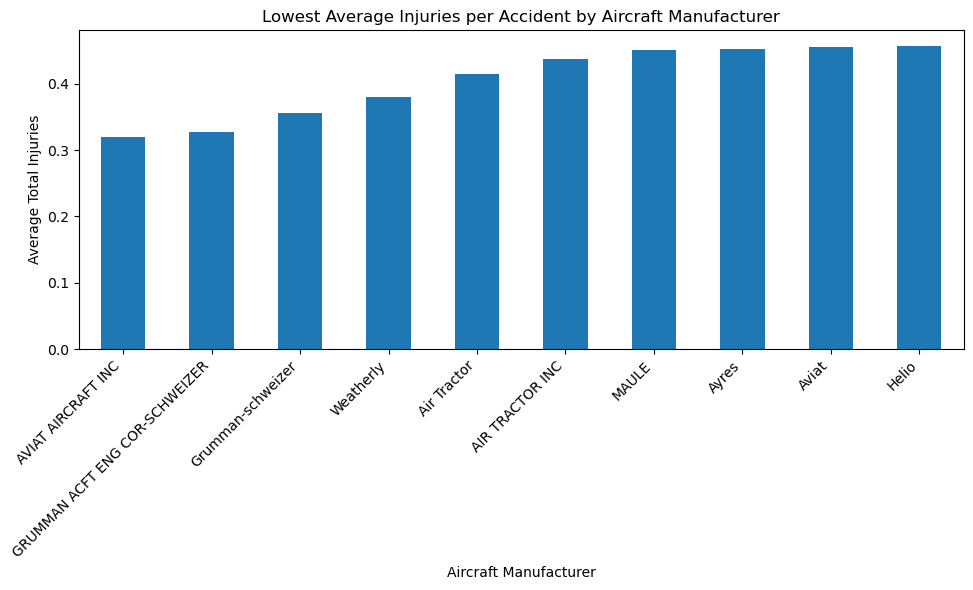

In [91]:
plt.figure(figsize=(10, 6))

filtered_risk["avg_total_injuries"].head(10).plot(kind="bar")

plt.title("Lowest Average Injuries per Accident by Aircraft Manufacturer")
plt.ylabel("Average Total Injuries")
plt.xlabel("Aircraft Manufacturer")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


The bar chart displaying average injuries per accident by aircraft manufacturer directly supports Recommendation 1 by highlighting manufacturers with lower injury severity. This visualization provides a clear and accessible comparison for non-technical stakeholders.

**Accident Count vs Injury Severity**

This graph explains why accident count alone is misleading.
It directly supports:
Recommendation 2: Avoid decisions based solely on accident frequency

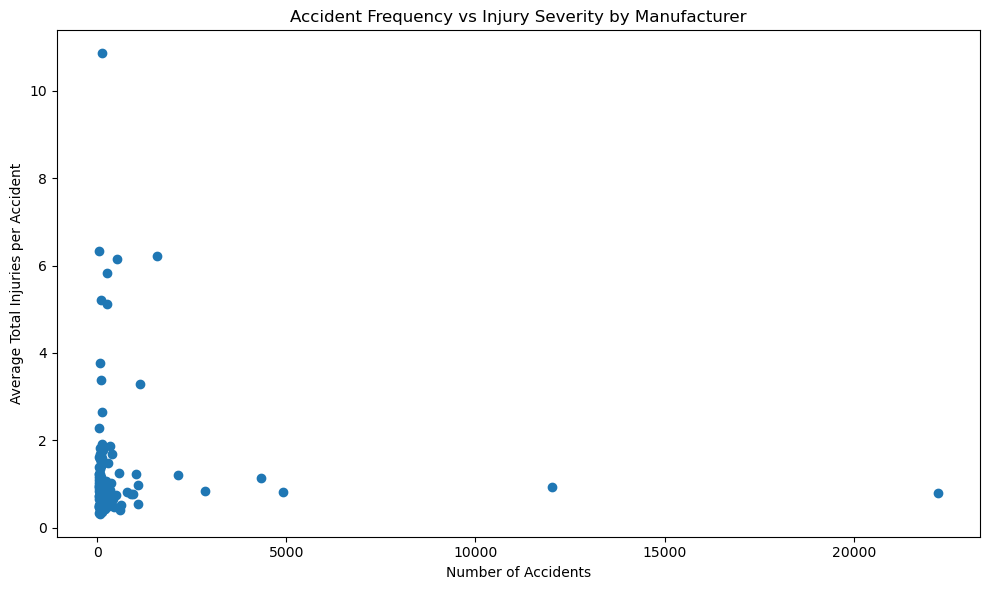

In [92]:
plt.figure(figsize=(10, 6))

plt.scatter(
    filtered_risk["accident_count"],
    filtered_risk["avg_total_injuries"]
)

plt.xlabel("Number of Accidents")
plt.ylabel("Average Total Injuries per Accident")
plt.title("Accident Frequency vs Injury Severity by Manufacturer")

plt.tight_layout()
plt.show()


Some manufacturers appear frequently in accident records simply because they are widely used. This chart shows that higher accident counts do not always correspond to higher injury severity.

**Injury Type Breakdown**

Executives care more about fatalities than minor injuries.

This graph shows what kind of risk exists, not just how much.

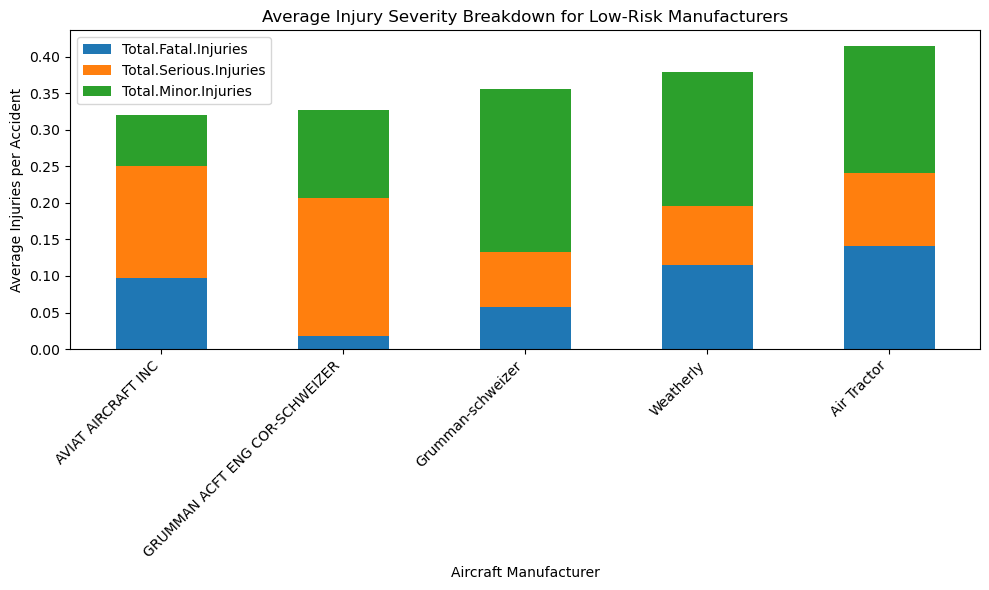

In [93]:
severity_by_make = (
    risk_df
    .groupby("Make")[[
        "Total.Fatal.Injuries",
        "Total.Serious.Injuries",
        "Total.Minor.Injuries"
    ]]
    .mean()
    .loc[top_low_risk.index]
)

severity_by_make.plot(
    kind="bar",
    figsize=(10, 6),
    stacked=True
)

plt.title("Average Injury Severity Breakdown for Low-Risk Manufacturers")
plt.ylabel("Average Injuries per Accident")
plt.xlabel("Aircraft Manufacturer")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Even among lower-risk manufacturers, injury severity differs. This breakdown helps prioritize manufacturers with fewer fatal and serious injuries.

**Risk Trend Over Time**

Shows whether safety performance is:
- Improving
- Stable
- Getting worse
  This supports long-term purchasing strategy.

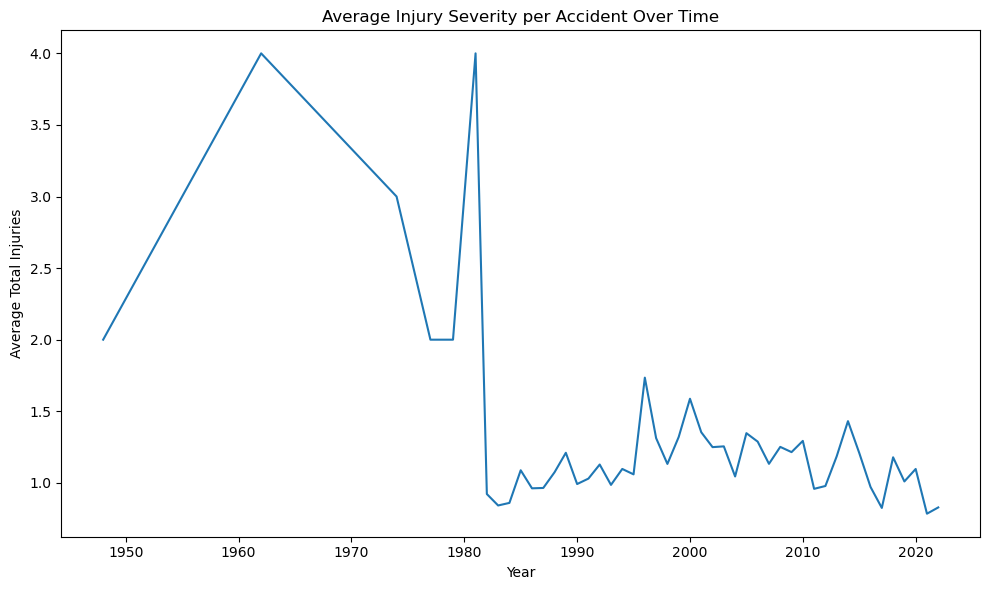

In [94]:
risk_df["Year"] = risk_df["Event.Date"].dt.year

yearly_risk = (
    risk_df
    .groupby("Year")["Total.Injuries"]
    .mean()
)

plt.figure(figsize=(10, 6))
plt.plot(yearly_risk)

plt.title("Average Injury Severity per Accident Over Time")
plt.xlabel("Year")
plt.ylabel("Average Total Injuries")

plt.tight_layout()
plt.show()


This trend helps assess whether aviation safety outcomes are improving over time, which informs long-term investment decisions.

**BUSINESS RECOMMENDATIONS**

Data does not create value. Decisions do.

Each recommendation must answer:

- What should the business do?

- Why does the data support this?

- What risk does it reduce?

**Identify Top Low-Risk Manufacturers**

In [95]:
filtered_risk

,avg_total_injuries,accident_count
Make,,
AVIAT AIRCRAFT INC,0.319444,72
GRUMMAN ACFT ENG COR-SCHWEIZER,0.327586,58
Grumman-schweizer,0.355372,121
Weatherly,0.379310,87
Air Tractor,0.415126,595
...,...,...
AIRBUS,5.828685,251
Mcdonnell Douglas,6.146388,526
Boeing,6.217828,1593


In [96]:
top_low_risk = filtered_risk.head(5)  # explicitly extract the lowest risk manufacturers
top_low_risk


,avg_total_injuries,accident_count
Make,,
AVIAT AIRCRAFT INC,0.319444,72
GRUMMAN ACFT ENG COR-SCHWEIZER,0.327586,58
Grumman-schweizer,0.355372,121
Weatherly,0.379310,87
Air Tractor,0.415126,595


**Recommendations**

### Recommendation 1: Prioritize Aircraft from Lower-Risk Manufacturers
Analysis shows that certain aircraft manufacturers are associated with significantly lower average injury counts per accident. The company should prioritize aircraft purchases from these manufacturers to reduce safety risk and potential liability exposure.

**Business Impact:** Lower injury severity reduces operational risk, insurance costs, and reputational damage.

---

### Recommendation 2: Avoid Decisions Based Solely on Accident Frequency
Some aircraft manufacturers appear frequently in accident records due to high usage rates, not necessarily poor safety performance. Decision-making should focus on accident severity metrics rather than raw accident counts.

**Business Impact:** Prevents incorrectly excluding widely used but safe aircraft from consideration.

---

### Recommendation 3: Use Injury Severity as a Core Safety Metric
Average injury count per accident provides a more actionable measure of risk than accident occurrence alone. This metric should be incorporated into ongoing aircraft evaluation and procurement processes.

**Business Impact:** Enables consistent, data-driven safety assessments for future aircraft acquisitions.

**INTERACTIVE DASHBOARD (TABLEAU)**

Your dashboard should help the stakeholder answer:

1. Which aircraft manufacturers are lowest risk?
2. How does injury severity compare across manufacturers?
3. How has risk changed over time?

**Confirm Data for Tableau**

In [103]:

"../data/processed/aviation_cleaned.csv"

'../data/processed/aviation_cleaned.csv'

To view the tableau dashboards click the link below.

[View the Tableau Dashboard](https://public.tableau.com/app/profile/eve.michelle/viz/AviationSafetyRiskAnalysis/Dashboard1?publish=yes )
